Introduction to Data Science<br/>
[Oregon Curriculum Network](http://www.4dsolutions.net/ocn)

Notebooks: 
[[1](IntroDS001.ipynb)]
[[2](IntroDS002.ipynb)]
[[3](IntroDS003.ipynb)]
[[4](IntroDS004.ipynb)]
[[5](IntroDS005.ipynb)]
[[6](IntroDS006.ipynb)]
[[Appendix](Appendix.ipynb)]

# On the Road with Data Science Tools

If you're able to install the litany of packages imported below, you're in good shape to do some real data science computing. Not that you couldn't go further, and install more.  Bokeh, for example.  We'll get to more too.  But lets start with a core set of tools, in the Python stack.

You'll have access to probability curves galore (the pdfs, controlled by their parameters), and their corresponding cdfs.  You'll have ways to sample, and ways to go back and forth, from probability to zscore, from zscore to probability.

![overview](http://greenteapress.com/thinkstats2/html/thinkstats2026.png)

Figure 6.2: A framework that relates representations of distribution functions.

*Think Stats* by Allen B. Downing
ISBN-13: 978-1491907337
ISBN-10: 1491907339 

What's a zscore again?  That's not an idea from Python, but from statistics, and you might think of z for Zone.  If "mean" $\mu$ is the middle fence, then on either side, you're some distance from the fence, if not sitting right on it.  How far away from the fence are you?  We calibrate in Zones (z zones) with grid lines across the field every standard deviation away.

Lets get to zscores pretty soon then, shall we?

In [1]:
# Python Standard Library
import math
import sys

# 3rd party, might need to conda or pip install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, binom, poisson, zscore
import scipy
import seaborn as sns

print("matplotlib", matplotlib.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("seaborn:", sns.__version__)
print("pandas:", pd.__version__)

matplotlib 3.1.3
numpy: 1.17.3
scipy: 1.4.1
seaborn: 0.10.0
pandas: 1.0.3


In [2]:
print("python itself:", sys.version)
sys.path.append("./python")  # local subfolder

python itself: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


What's [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) again?  That's a number you may compute.  Get the mean first...

$$
A={\frac {1}{n}}\sum _{i=1}^{n}a_{i}={\frac {a_{1}+a_{2}+\cdots +a_{n}}{n}}
$$

then sum the 2nd powers (picture squares or triangles, many deltas) for all the differences, and divide by how many. Call that the variance, or "average of 2nd power differences".

$$
V = \sigma^{2}
$$

Now take the 2nd root of variance and you're done, you have the standard deviation at last.

$$
\sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } }
$$

In [3]:
rng = np.random.default_rng(12345)  # the newer semantics
type(rng)

numpy.random.generator.Generator

We just gave birth to a Generator in the namespace of numpy types.  It'll serve as a source of randomness, modulated in various ways, the the nozzle on a garden hose shapes that randomly flying water.

Here's a list of [some different random generators](https://perchance.org/useful-generators), outside of numpy, each with a special purpose focus.

The method below says what pool we're allowed to pick from (integers from -4 to 4, 5 not included), how many -- play around if you have your working copy -- and a policy of "putting back" meaning once you pick from the source, you're allowed to put back.

In [4]:
sample = rng.choice(range(-4, 5), size=100, replace=True)
sample[:20]

array([ 2, -2,  3, -2, -3,  3,  1,  2,  4, -1,  3, -2,  1,  1, -3, -3, -2,
        2,  1,  4])

The reason I added ```./python``` to ```sys.path``` above was so I could import ```statsfun.py``` and make use of its few functions.  [The source code](./python/statsfun.py) is here in this repo.

In [5]:
import statsfun  # won't unless in your sys.path somewhere

In [6]:
hand = rng.choice(statsfun.deck_of_cards(), size=5, replace=False) # run a few times
hand

array([['Ace', 'Hearts'],
       ['King', 'Spades'],
       ['Queen', 'Diamonds'],
       ['Jack', 'Diamonds'],
       ['10', 'Clubs']], dtype='<U8')

In [7]:
x_bar = sample.sum()/len(sample)  # not mu!
x_var = ((sample - x_bar)**2).sum()/len(sample)
x_std = np.sqrt(x_var)

print("Spelled out...")
print("x_bar = ",x_bar)
print("x_var = ",x_var)
print("x_std = ",x_std)
print("-" * 10)
print("Or let numpy do it...")
print("x_bar = ", sample.mean())
print("x_var = ", sample.var())
print("x_std = ", sample.std())

Spelled out...
x_bar =  0.0
x_var =  6.12
x_std =  2.4738633753705965
----------
Or let numpy do it...
x_bar =  0.0
x_var =  6.12
x_std =  2.4738633753705965


```statsfun.py``` will computer these too, and without presuming numpy arrays.  Ordinary for looping gets used, whereas "Spelled Out" above assume "vectorized operations" meaning no explicit looping is required.

In [8]:
from statsfun import mean, var, std

print("Or let numpy do it...")
print("x_bar = ", mean(sample))
print("x_var = ", var(sample))
print("x_std = ", std(sample))

Or let numpy do it...
x_bar =  0.0
x_var =  6.12
x_std =  2.4738633753705965


## Pascal's Triangle

The rows of Pascal's Triangle each form a binomial distribution.  The elements of any row correspond to the coefficients of a polynomial of the form below.

$$
(x+y)^n = \sum_{k=0}^n {n \choose k} x^{n - k} y^k
$$

In other words, the coefficients correspond to:

$$
\binom{n}{k} = \frac{n!}{k!(n - k)!} 
$$


In [9]:
from statsfun import pascal

In [10]:
row  = 15
data = pascal(row)
data

[1,
 15,
 105,
 455,
 1365,
 3003,
 5005,
 6435,
 6435,
 5005,
 3003,
 1365,
 455,
 105,
 15,
 1]

In [11]:
%matplotlib inline

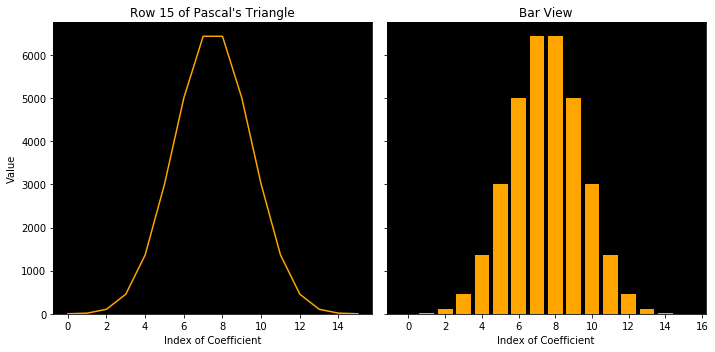

In [12]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('121')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Row {} of Pascal's Triangle".format(row))
ax1.set_xlabel('Index of Coefficient')
ax1.set_ylabel('Value')
plt.plot(data, color="orange")

ax2   = plt.subplot('122', sharey=ax1)  # I will explain
rect = ax2.patch  # a Rectangle instance
rect.set_facecolor('black')
plt.setp(ax2.get_yticklabels(), visible=False)

plt.title("Bar View".format(row))
ax2.set_xlabel('Index of Coefficient')
plt.bar(range(len(data)), data, color="orange");

fig.tight_layout()
plt.show();

## matplotlib

Before we continue with some more important distributions, both discrete and continuous, lets remark a bit on what just happened.  Two black and orange graphics appeared (unless this is a forked or branched version), and could have been saved to png or other format, including at high dpi, suitable for making into glossy posters.

Not a lot of coding went in to creating the above graphic, two side-by-side subplots.  Getting good results is relatively easy, from the point of view of grateful users of this capable API.  John D. Hunter (1968-2012) [gave Python the power of MATLAB](https://matplotlib.org/3.2.1/users/history.html) when it comes to making publication quality graphics.

A graphic that begins its life [in a Jupyter Notebook](logos2.ipynb) may be destined for publication within and entirely different document. The Notebook might be more like a lab notebook, for the individual technician.  That doesn't mean unshared necessarily, but it may mean not published.  

A Notebook is potentially like a scratch pad wherein works for the ages get developed, saved, and exhibited elsewhere.  

That's one workflow among many.

A Notebook might also be considered the finished work.  Or a work in progress.

While we're here, [lets mention seaborn](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html) as a good example of another layer.  Think of a wardrobe of custom clothes.  You're free to use old bits with new bits. Seaborn adds not just good cosmetics, but a host of new plots to our plotters' arcade.

A resource to check out next might be Edward Tufte's works on effective data visualization.  Now that you're gaining new powers, don't go overboard using "chart junk".  A clutter-free aesthetic helps keep your storyline going, just for starters.

Lets let Seaborn do its magic and then, uncharacteristically, revert back to matplotlib defaults, even after Seaborn has loaded.  This would not normally be a part of the workflow, yet here it makes sense.  Our task here is to explore what is doable.

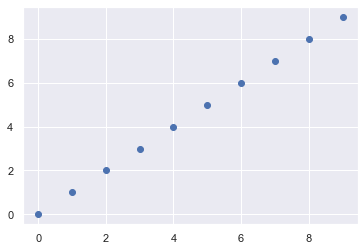

In [13]:
import seaborn as sns
sns.set()

f = plt.figure()
plt.plot(range(10), range(10), "o")
plt.show()
f.savefig("foo.png", bbox_inches='tight', dpi=600)

In [14]:
sns.reset_defaults()

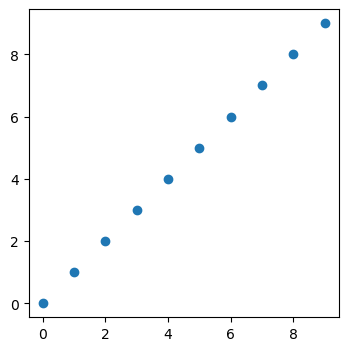

In [15]:
f = plt.figure(figsize=(4,4))
plt.plot(range(10), range(10), "o")
plt.show()
f.savefig("foo.png", bbox_inches='tight', dpi=600)

Yet with all this at our fingertips, there's yet so much more...

* [Altair](https://altair-viz.github.io/)
* [Bokeh](https://bokeh.org/)
* [Matplotlib](https://matplotlib.org/)
* [Seaborn](https://seaborn.pydata.org/)

![penguin](https://media.giphy.com/media/SKab6E8Qeg7sY/giphy.gif)

The [Linear Regression Sandbox](LinearRegression.ipynb) (a Notebook included in this repo), introduces the concept of interactive widgets and their role in data visualizations.  The same widgets may likewise be used with Bokeh.

Bokeh is more ambitious than matplotlib in that it provides a server that will directly support interactive web-based (http) applications, similar to the Jupyter Notebooks model, but standalone. 

For example, your Bokeh application could be a dashboard converting real time sensor data into frequently updated graphics.

## Binomial Distribution

Lets say an egg factory, staffed by chickens (unpaid, but fed) and various humans (presumably paid, perhaps in eggs), has a "bad egg" versus "good egg" classification based on various criteria.  

An egg could be considered "bad" for a list of reasons, all of which we need not go into here.  Lets just say that the frequency of "bad eggs" is about 1 per 100 overall, meaning "good eggs" account for the other 99/100.  Having no "in between" or other longer list of categories is what makes this distribution "binomial" (two possibilities only).

Like most egg producers, our factory sells eggs by the dozen.  Lets call these "egg cartons" which seems sensible.  Instead of ```rng.choice``` which presumes a uniform distribution, we'll fit the ```binomial``` nozzle to the Generator garden hose.  Our "dozen" will comprise a first argument.

The cartons have slots for eggs.  Each slot gets to be a 1 or 0 (True or False) depending on if it contains a bad egg (less likely) or not (almost always).  The chance of each slot having a bad egg is not 1/12 or anything close to that high, it's 1/100.  However we want to count the number of bad eggs in samples of twelve.  Lots of cartons, the majority in fact, should have no bad egges whatsoever (given our expectation of 1/100 bad, taken as given in this case, not a statistic we're still hoping to determine).

Suppose we look at 10K egg cartons in our model (simulation), and wonder what percent of them, on average, will contain at least 1 bad egg (could be more).  

So now lets use the binomial distribution emulator to simulate a machine that packs 12 eggs per carton.  This machine itself does not reject bad eggs (not in this story).  Quality control has already occurred, which is how we got it down to 1 in 100 in the first place.  

Little stories like this have mnemonic value.  Statistics is replete with such "little stories" (models) that may be fitted to the current situation (the data at hand).

In [16]:
import numpy as np
rng = np.random.default_rng(54321) # get a spanking new Random Number Generator and seed it

In [17]:
# 12 slots, chances of being bad egg, number of trials
sample = rng.binomial(12, 1/100, 10_000)

How many, of the 10,000 cartons, contain a bad egg?  We hope not a lot.

In [18]:
cartons_with_all_good_eggs = sum(x==0 for x in sample)

print("Percent good cartons: {:4.2f}% ".format(100*cartons_with_all_good_eggs/len(sample)))

Percent good cartons: 89.36% 


In [19]:
cartons_with_any_bad_eggs = len(sample[sample>0]) # boolean filtering

print("Percent with at least one bad egg: {:4.2f}% ".format(100*cartons_with_any_bad_eggs/len(sample)))

Percent with at least one bad egg: 10.64% 


What's the average number of bad eggs per carton?  Every slot has one chance in a hundred of being bad. Assuming each slot is luck of the draw, that's 1/100 times 12 tries or 12/100, roughly .12 on average.  However our sample will likely deviate from the theoretical mean somewhat.

In [20]:
average_bad_eggs_per_carton = sample.mean()
average_bad_eggs_per_carton

0.1123

How about the standard deviation?  Lets get that directly from the sample, and use it below. This is going to help us with Z scores, which measure distance from the average (mean) in units of standard deviation.

In [21]:
bad_egg_cartons_std = sample.std()
bad_egg_cartons_std

0.33389925127199677

Lets go back to ```rng.choice``` again and grab a hundred values from our sample.  This is according to a uniform distrubution again, and without replacement (we don't want to see anything more than once).  No carton is more likely to be inspected than any other.  That's the joy of random number generators: they get to be our impartial judge, making decisions instantly on our behalf.

In [22]:
rng.choice(sample, 100).reshape(10,10)  # lets look at 30 from the 100 on file -- 1s are rarer

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

More instructive might be a tally of what our binomial function has begotten.  

Lets grab the Counter type from collections and send our sample through it.  The keys will be the unique values encounters, with the values being "how many of each".

In [23]:
from collections import Counter
tally_bad_cartons = Counter(sample)
tally_bad_cartons

Counter({0: 8936, 1: 1005, 2: 59})

Here's another way to compute that average, where the expression fed to sum counts as a "generator expression".  If you know Python pretty well, you know that's a "just in time" kind of object that produces next values only when needed.  However ```sum``` greedily eats everything.

In some future code cells, watch for generator tools from ```itertools```. These "just in time" generators are not unlike numpy's Generator.  But may we go ```next(rng)```?  No, rng is not a Python iterator, nor is it an iterable.

In [24]:
bad_carton_percent = 100 * sum(x > 0 for x in sample)/len(sample)
f"{bad_carton_percent}%"

'10.64%'

In [25]:
try:
    print(next(rng))
except TypeError as e:
    print(e)
    
try:
    rng = iter(rng)
except TypeError as e:
    print(e)

'numpy.random.generator.Generator' object is not an iterator
'numpy.random.generator.Generator' object is not iterable


So now it's time to count probabilities using the ```pmf``` method of the binomial distribution, as provided by ```scipy.stats```.  This is the first time we've used such a creature.  We need to feed it two things:  the average to expect (mu or x-bar, depending on whether it's a whole population or a sample), and the expected standard deviation.

Lets plug in the numbers we got from the stats above.

In [26]:
# binom from scipy.stats
discrete = binom(12, 0.01)
Counter(discrete.rvs(10000))

Counter({1: 1004, 0: 8939, 2: 56, 3: 1})

We do not expect exactly the same answers below, as the ```rvs(10_000)``` is generating a new sample. On the other hand, they should be fairly close, as 10K samples is enough to move use towards the same smooth mathematical limit in Infinity Town.

In [27]:
check = binom(12, 0.01).rvs(10_000) # random sampler
print("Mean: ", check.mean())
print("Std:  ", check.std())
print("-"*10)
print("Mean: ", average_bad_eggs_per_carton)
print("Std:  ", bad_egg_cartons_std)

Mean:  0.1175
Std:   0.3418972798955851
----------
Mean:  0.1123
Std:   0.33389925127199677


The biniomial distribution is a discrete (chopped up) version of the perfectly smooth Normal Distribution (more below).  

Instead of slots for 1s and 0s, our experiments may yield a continuous quantity such as volume, mass or density (mass/volume).  In moving from discrete to continuous, we pick up "density function" as the term for our curves.

Lets do 10 coin tosses in a row, 10K times, and bin the results according to how many Heads we get (could be Tails), from 0 to 10.  We'll make a histogram, which will automagically bin our results into one of 11 buckets, standing for the 0 to 10 heads we might get in ten tosses.

In [28]:
# p=0.5 means fair coin, H or T equally likely
number_of_heads = rng.binomial(10, p=0.5, size=10_000) # not scipy.stats.binom

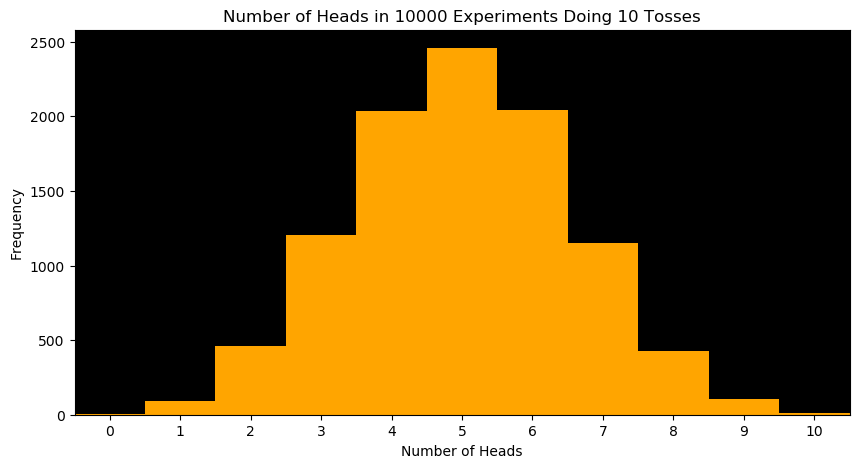

In [29]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('111')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Number of Heads in {} Experiments Doing {} Tosses".format(10_000,10))
ax1.set_xlabel('Number of Heads')
ax1.set_ylabel('Frequency')
plt.xticks(range(0,11))
ax1.set_xlim(-0.5,10.5)

plt.hist(number_of_heads, bins=[x-0.5 for x in range(12)], color="orange");
plt.show();

Are we ready for Z-scores yet?  We would like to see in place of Number of Heads, the Distance in Standard Deviations (1, 2, 3, 4 of them on either side of the mean).  Per the three sigma rule, we have almost 100% coverage within four standard deviations, even if a few anomoulous outliers sneak through.

In [30]:
Z = zscore(number_of_heads)
Z[:10]

array([ 1.26974872, -0.62313846, -1.88506324,  0.63878633,  0.63878633,
       -0.62313846,  1.26974872,  0.00782393,  0.00782393, -0.62313846])

In [31]:
print("Mean: ", Z.mean()) # should be close to 0
print("Std: ", Z.std())   # should be close to 1

Mean:  2.8492763703980015e-16
Std:  0.9999999999999998


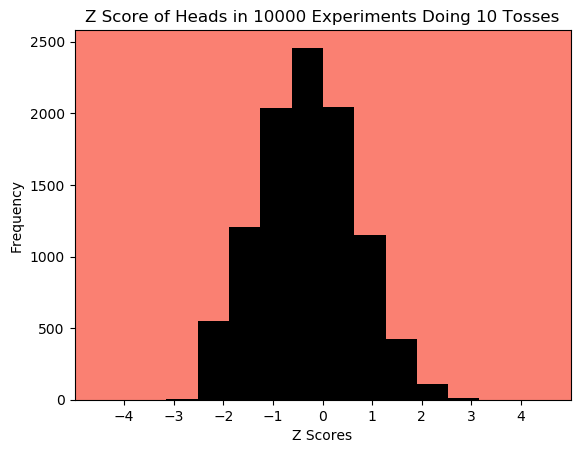

In [32]:
ax1   = plt.subplot('111') 
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('salmon')

plt.title("Z Score of Heads in {} Experiments Doing {} Tosses".format(10_000,10))
ax1.set_xlabel('Z Scores')
ax1.set_ylabel('Frequency')
plt.xticks(range(-4,5))
ax1.set_xlim(-5,5)

plt.hist(Z, color="black");
plt.show();

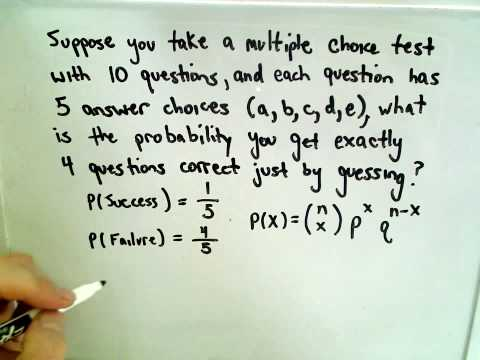

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo('xNLQuuvE9ug')

In [34]:
dist = binom(10, 0.2) # 10 quiz questions, 0.2 chance of success if guessing
dist.pmf(4)           # chances of getting exactly 4 correct

0.08808038400000008

## Poisson Distribution

Before we get the Normal Distribution, which is continuous, lets look at another discrete distribution, [the Poisson distribution](https://youtu.be/8px7xuk_7OU).  Rather then success or failure, a binary outcome, a result of trials, we're interested in events, and their number within some time or space interval.

Poisson Distribution:

$$
P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}
$$

The Poisson distribution is the limit of the binomial distribution for large N.

In [35]:
rng = np.random.default_rng(938392)

In [36]:
s = rng.poisson(lam=10, size=1000)

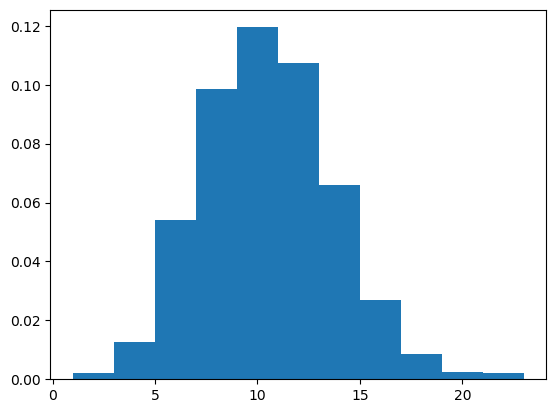

In [37]:
count, bins, ignored = plt.hist(s, 11, density=True);

In [38]:
(s.mean(), s.var(), s.std())

(10.011, 10.288879, 3.20762825152791)

Lets try the same thing in scipy.  See below.

In [39]:
s = poisson(mu=10).rvs(10_000) # scipy version
(s.mean(), s.var(), s.std())

(10.0134, 9.910620440000002, 3.1481137908277717)

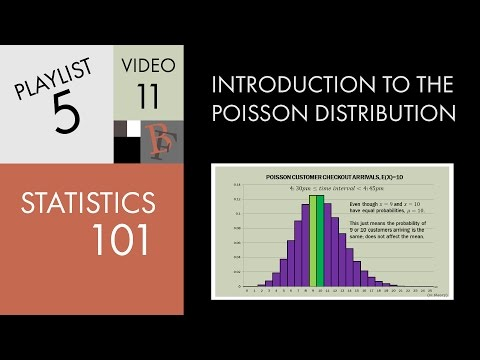

In [40]:
YouTubeVideo('8px7xuk_7OU')

Although the poisson is discrete, not continuous, using a spikey curve still makes the "curve" clear.

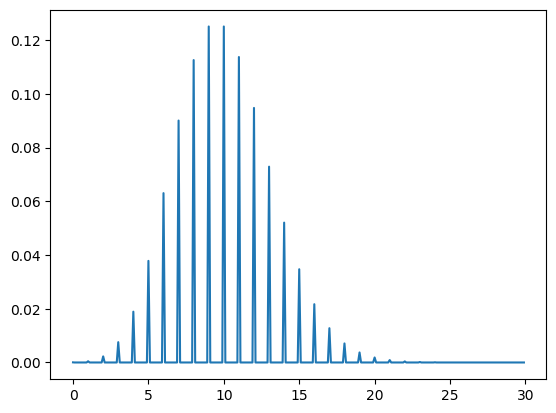

In [41]:
domain = np.arange(0,30, 0.1)
plt.plot(domain, poisson(mu=10).pmf(domain));

In [42]:
poisson(mu=10).pmf(7)

0.090079225719216

## Standard Normal Distribution

The Normal Distribution is the best known of the many statistical probability curves.  It's symmetric about the mean, and mean = mode = median.  The values taper off in a way to follows the three sigma rule shown below.

Both ```scipy.stats``` and ```np.random``` have a large vocabulary of probability curves that behave in a similar manner, but with ```scipy.stats``` given the most comprehensive set of capabilities.  

Each curve in scipy.stats, if continuous, comes with a pdf and a cdf.  Discrete curves come with a pmf and cmf.  We also get an rvs for randomly sampling from the curve in question.

What ```norm.pdf``` is giving us is the tiny probability that each of these numbers, from -4 to 4, actually occurs.  The bell shape answer is governed by a precise mathematical expression credited to Gauss.  We are simply plotting a curve of the form $y = f(x)$ where $f$ is parameterized by two additional settings: mean and standard deviation.

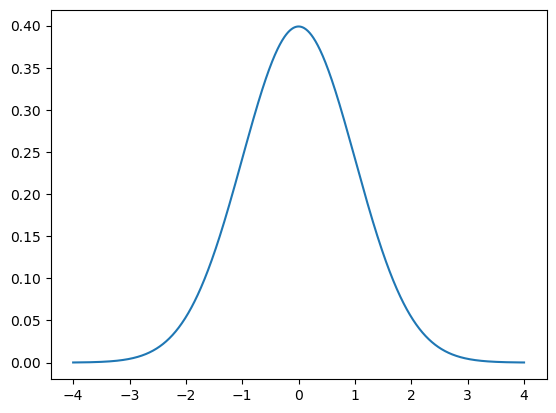

In [43]:
domain = np.linspace(-4,4,1000)  # 1000 equally spaced points between -4 and 4 inclusive
y = norm.pdf(domain, 0, 1)       # from scipy.stats
plt.plot(domain,y);              # total area under pdf == 1

We might also start with a smattering of data and find the normal curve with the best fit so far, given this particular sample.  Lets do that, starting with a sample we already trust is standard bell curved.

In [44]:
sample = rng.standard_normal(1001) # a thousand and one normalized floats
best_fit = norm.fit(sample)        # note use of fit. mean and sigma TBD.
best_fit

(-0.06151549589361088, 0.9898204926543183)

Not bad. Our miracle random number server delivered on its promise.  We should take a look:

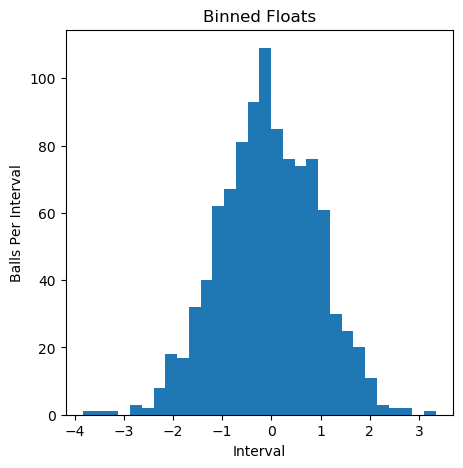

In [45]:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot('111')  # I will explain
plt.title("Binned Floats")
plt.ylabel("Balls Per Interval")
plt.xlabel("Interval")
plt.hist(sample, bins=30);

Corresponding to any probability density function (pdf) is its integral, or cumulative density function (cdf).  This gives a readout regarding the accumulated total aread under the pdf up to some value. With regard to the Standard Normal Distribution, one would expect to accumulate a probability of about 1 between -4 and 4 i.e. pretty much all the probabilities are covered by four standard deviations either way, even though in principle the curve has infinitely long tails.

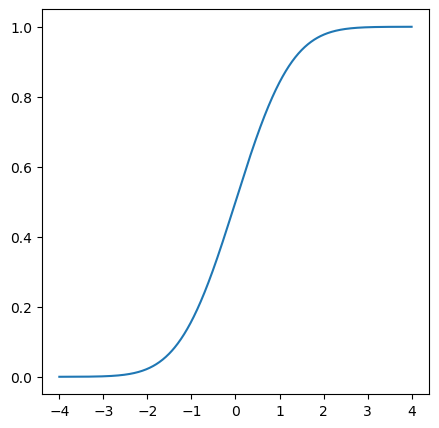

In [46]:
fig = plt.figure(figsize=(5,5))
domain = np.linspace(-4,4,1000)
ax1 = plt.subplot('111')
y = norm.cdf(domain, 0, 1) 
plt.plot(domain, y);

### Sidebar: Pascal's Pyramid

Yes, it exits and is [well-defined](http://4dsolutions.net/ocn/numeracy2.html), with 1 at the top, a triangular layer of three 1's below that, think of how many pathways to each ball, falling from the apex, the three ways to slide down to the next level.  The balls pile up in what really looks more like a bell, given it's not flat like a sheet of paper.

## IQ Data

IQ data is often used to impart normal distribution concepts, because it's designed to have specific characteristics.  The standard deviation is defined to be 15 points, meaning every 15 points away from 100 represents one standard deviation, or a z-score of 1.0.

The z-score represents a score in terms of z-units or standard deviation units.  The probability of having a z-score of 3 or above, is the same as the probability as an IQ score of 100 + 15 + 15 + 15.  

Find the cummulative probability using the ```norm.cdf``` with the actual IQ score, given you already have a normal distribution with $\mu$ = 100 and $\sigma$ = 15.

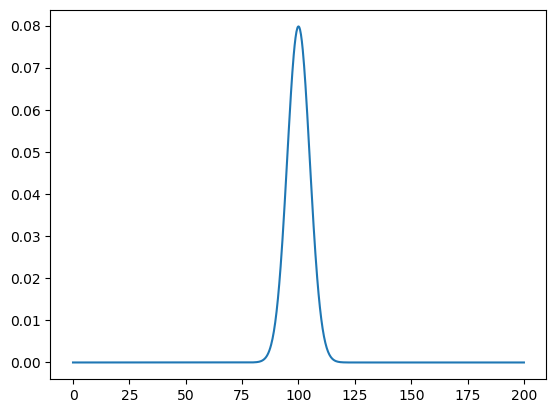

In [47]:
domain = np.linspace(0,200,1000)
y = norm.pdf(domain, 100, 5)
plt.plot(domain,y);

In [48]:
def z_score(x, mu, sigma, n=1):
    return (x - mu)/(sigma/math.sqrt(n))

z = z_score(115, 100, 5) # one standard deviation above mean
z

3.0

Lets create a standard normal distribution.  Now that we have the z-score, the probability of having an IQ of 115 or below is about 84%.

In [49]:
d = norm(0, 1) # standard normal distribution
d.cdf(z)

0.9986501019683699

In [50]:
d = norm(loc=100.0, scale=5.0) # back to the original bell curve
d.cdf(115)  # same answer as before

0.9986501019683699

The probability of having an IQ of 115 or above is simply 1 minus the previous result.

In [51]:
d = norm(loc=100.0, scale=15.0)
1 - d.cdf(115)

0.15865525393145707

In [52]:
z = z_score(93, 100, 15) # adjusted for sample size
z

-0.4666666666666667

In [53]:
d = norm(0, 1)
d.cdf(z)

0.32036919090127036

In [54]:
d = norm(100, 15)
d.cdf(93) # again, same answer

0.32036919090127036

In [55]:
z = z_score(115, 100, 15)
d = norm(0, 1)
d.cdf(z)

0.8413447460685429

In [56]:
z

1.0

In [57]:
d.ppf(0.8413447460685429)  # going backwards from cumulative population to z-score

1.0

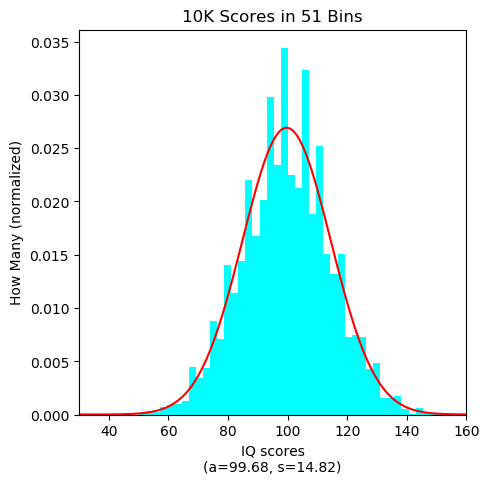

In [58]:
# ? np.random.choice
scores = range(0,201)
iqs = np.random.choice(a=scores, size=10000, p=norm.pdf(scores, 100, 15))
buckets = 50

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot('111')

xbar, std = approx = norm.fit(iqs)    # remember these were randomly selected
best_fit = norm(*approx)  # define a curve based on fitting the random sample

kwargs = {"color":"cyan"}
x, bins, p = plt.hist(iqs, bins=buckets, density=True, **kwargs)

plt.title(f"10K Scores in {len(bins)} Bins")
plt.xlabel(f"IQ scores\n(a={xbar:3.2f}, s={std:2.2f})")
plt.ylabel("How Many (normalized)")
plt.xlim(30, 160)
plt.plot(scores, best_fit.pdf(scores), color='red');

In [59]:
norm.fit(iqs)

(99.6813, 14.820105610622349)

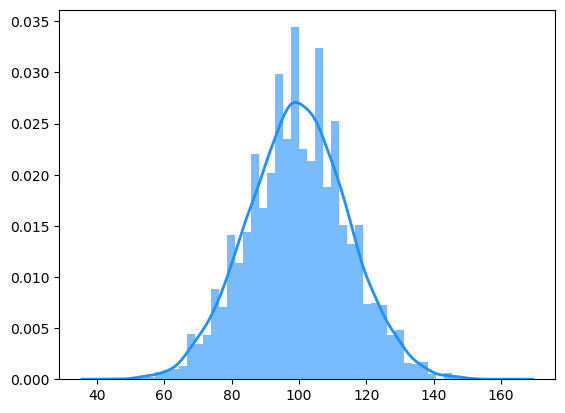

In [60]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
sns.distplot(iqs, bins=buckets, color="dodgerblue", **kwargs);

# Three Sigma Rule

* Plus/minus 1 sigma from mean:  about 68.2% of a population
* Plus/minus 2 sigmas from mean: about 95.4% of a population
* Plus/minus 3 sigmas from mean: about 99.7% of a population

In [61]:
d = norm(100, 15)
total_area = d.cdf(100+15) - d.cdf(100-15)
print(f"{total_area:5.3f}")

0.683


In [62]:
d = norm(100, 15)
total_area = d.cdf(100+2*15) - d.cdf(100-2*15)
print(f"{total_area:5.3f}")

0.954


In [63]:
d = norm(100, 15)
total_area = d.cdf(100+3*15) - d.cdf(100-3*15)
print(f"{total_area:5.3f}")

0.997


### Shading Areas Under the Curve

In [64]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [65]:
d.cdf(115)-d.cdf(100-15)

0.6826894921370859

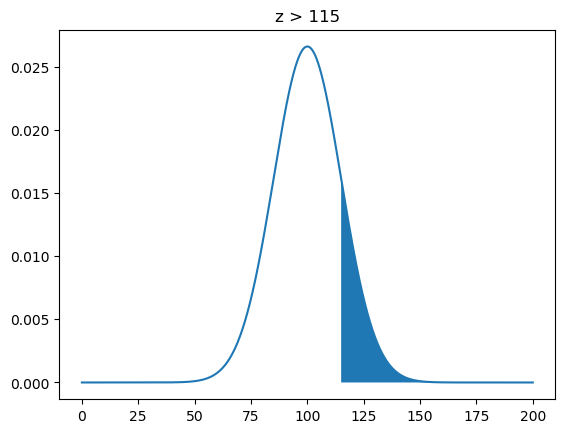

In [66]:
domain = np.arange(0, 200, 0.001)
draw_z_score(domain, domain>115, 100, 15, 'z > 115')

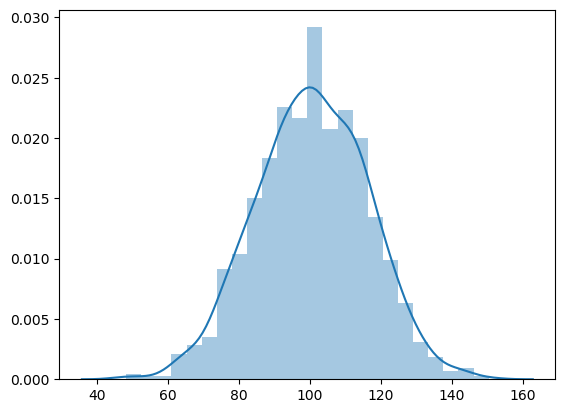

In [67]:
data = np.random.normal(loc=100, scale=15, size=1000)
sns.distplot(data, hist=True)
# plt.plot(scores, norm(100, 15).pdf(scores), color='red');
plt.show()

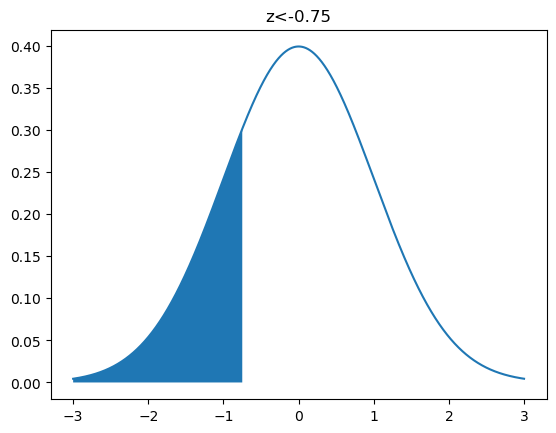

In [68]:
x = np.arange(-3,3,0.001)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

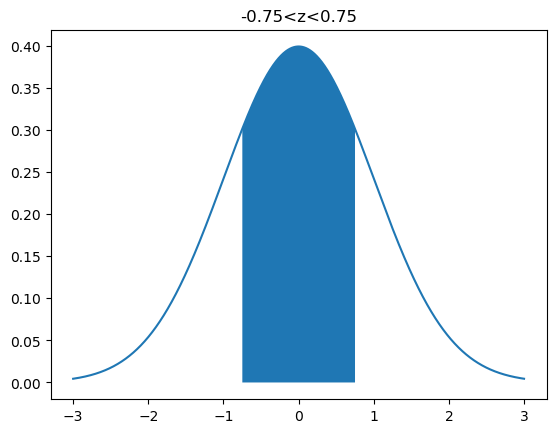

In [69]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

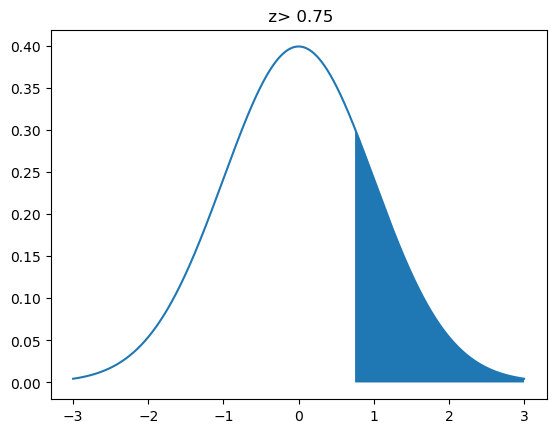

In [70]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, x > z0, 0, 1, ' z> 0.75')

![overview](http://greenteapress.com/thinkstats2/html/thinkstats2026.png)

Figure 6.2: A framework that relates representations of distribution functions.

*Think Stats* by Allen B. Downing
ISBN-13: 978-1491907337
ISBN-10: 1491907339 

[Hypothesis Testing](http://greenteapress.com/thinkstats2/html/thinkstats2010.html#sec95)
*Ibid.*

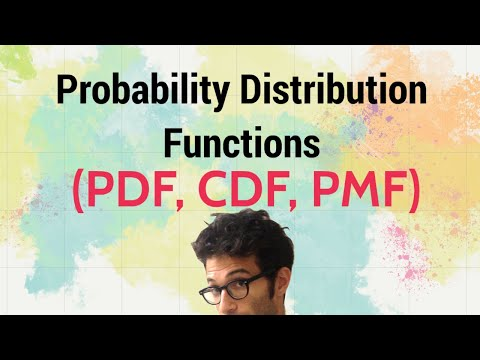

In [71]:
YouTubeVideo('YXLVjCKVP7U')

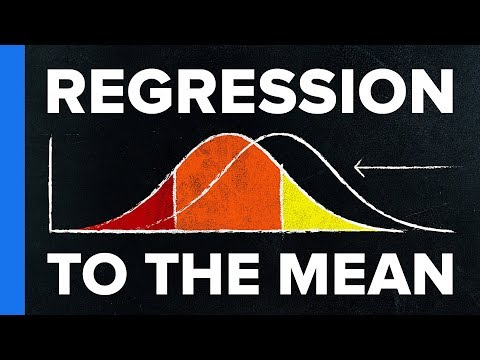

In [72]:
YouTubeVideo('1tSqSMOyNFE')